<a href="https://colab.research.google.com/github/akhii-leesh/Bone-Fracture-Classification-using-CNN-Resnet/blob/main/BoneFracture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as TF
import torchvision
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [3]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device}")

Using cuda


In [6]:
IMAGE_SIZE=256
image_size=IMAGE_SIZE

In [7]:
train_data = ImageFolder(root='/content/drive/MyDrive/BoneFracture/train',
                         transform=torchvision.transforms.Compose(
                            [
                                torchvision.transforms.Resize((image_size,image_size)),
                                torchvision.transforms.ToTensor(),
                                torchvision.transforms.Normalize(mean=0,std=1)
                            ]
                        ),
                         target_transform=None)
train_data

Dataset ImageFolder
    Number of datapoints: 9246
    Root location: /content/drive/MyDrive/BoneFracture/train
    StandardTransform
Transform: Compose(
               Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=0, std=1)
           )

In [8]:
test_data = ImageFolder(root='/content/drive/MyDrive/BoneFracture/test',
                        transform=torchvision.transforms.Compose(
                            [
                                torchvision.transforms.Resize((image_size,image_size)),
                                torchvision.transforms.ToTensor(),
                                torchvision.transforms.Normalize(mean=0,std=1)
                            ]
                        ),
                        target_transform=None)
test_data

Dataset ImageFolder
    Number of datapoints: 506
    Root location: /content/drive/MyDrive/BoneFracture/test
    StandardTransform
Transform: Compose(
               Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=0, std=1)
           )

In [9]:
train_data.classes,test_data.classes

(['fractured', 'not fractured'], ['fractured', 'not fractured'])

Image sample

Text(0.5, 1.0, 'Bone fractured')

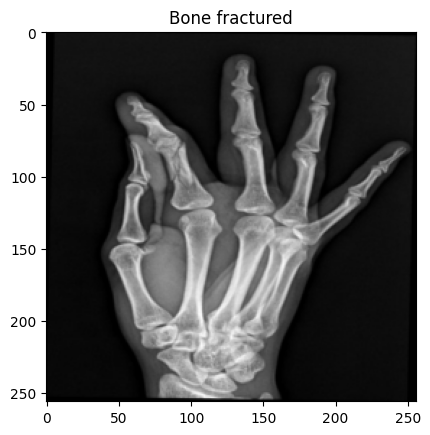

In [10]:
import matplotlib.pyplot as plt
image,label = train_data[0]
plt.imshow(image.permute(1,2,0))
plt.title(f"Bone {train_data.classes[label]}")

In [11]:
from torch.utils.data import DataLoader
train_loader = DataLoader(dataset=train_data,batch_size=32,shuffle=True)
test_loader = DataLoader(dataset=test_data,batch_size=32,shuffle=False)
train_loader,test_loader

(<torch.utils.data.dataloader.DataLoader at 0x798ea38c3bb0>,
 <torch.utils.data.dataloader.DataLoader at 0x798ea38c3a90>)

In [12]:
model = torchvision.models.resnet50(pretrained=True)
model

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 171MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [13]:
for param in model.parameters():
  param.requires_grad=False

In [14]:
in_feat = model.fc.in_features
model.fc = nn.Linear(in_features=in_feat,out_features=1)
model = model.to(device)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [15]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [16]:
import time

In [17]:
for inp,lab in train_loader:
  inp=inp.to(device)
  lab=lab.to(device).float().view(-1,1)
  print(inp.shape,lab.shape)
  break

torch.Size([32, 3, 256, 256]) torch.Size([32, 1])


In [18]:
def train_model(model,criterion,optimizer,train_loader,num_epochs=10):
  start_time=time.time()
  for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}/{num_epochs}')
    print('-' * 10)
    model=model.to(device)
    model.train()

    running_loss = 0.0
    running_corrects = 0
    total_samples = 0
    for inputs,labels in train_loader:
      inputs = inputs.to(device)
      labels = labels.to(device).float().view(-1,1)
      optimizer.zero_grad()
      outputs = model(inputs)
      loss = criterion(outputs,labels)

      loss.backward()
      optimizer.step()
      preds = torch.sigmoid(outputs) > 0.5

      running_loss += loss.item() * inputs.size(0)
      running_corrects += torch.sum(preds == labels.data)
      total_samples += inputs.size(0)

    epoch_loss = running_loss / total_samples
    epoch_acc = running_corrects.double() / total_samples
    print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
  curr_time=time.time()
  curr_time=curr_time-start_time
  print(f"Training completed in {curr_time}")

  return model

In [19]:
def test_model(model,test_loader,criterion):
  model=model.to(device)
  model.eval()
  running_loss = 0.0
  running_corrects = 0
  total_samples = 0
  with torch.no_grad():
    for inputs,labels in test_loader:
      inputs = inputs.to(device)
      labels = labels.to(device).float().view(-1,1)
      outputs = model(inputs)
      loss = criterion(outputs,labels)
      preds = torch.sigmoid(outputs) > 0.5
      running_loss += loss.item() * inputs.size(0)
      running_corrects += torch.sum(preds == labels.data)
      total_samples += inputs.size(0)

  test_loss = running_loss / total_samples
  test_accuracy = running_corrects.double() / total_samples
  print(f'Test Loss: {test_loss:.4f} Acc: {test_accuracy:.4f}')

  return test_loss, test_accuracy

In [20]:
model_trained = train_model(model,criterion,optimizer,train_loader,num_epochs=10)

Epoch 1/10
----------
Train Loss: 0.4277 Acc: 0.8049
Epoch 2/10
----------
Train Loss: 0.2855 Acc: 0.8802
Epoch 3/10
----------
Train Loss: 0.2599 Acc: 0.8924
Epoch 4/10
----------
Train Loss: 0.2521 Acc: 0.8994
Epoch 5/10
----------
Train Loss: 0.2200 Acc: 0.9116
Epoch 6/10
----------
Train Loss: 0.2070 Acc: 0.9201
Epoch 7/10
----------
Train Loss: 0.2601 Acc: 0.9044
Epoch 8/10
----------
Train Loss: 0.1888 Acc: 0.9276
Epoch 9/10
----------
Train Loss: 0.1657 Acc: 0.9332
Epoch 10/10
----------
Train Loss: 0.1646 Acc: 0.9358
Training completed in 3361.5730063915253


In [21]:
loss,acc = test_model(model_trained,test_loader,criterion)

Test Loss: 0.2184 Acc: 0.9190
